In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv


In [2]:

df = pd.read_csv("/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv")
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

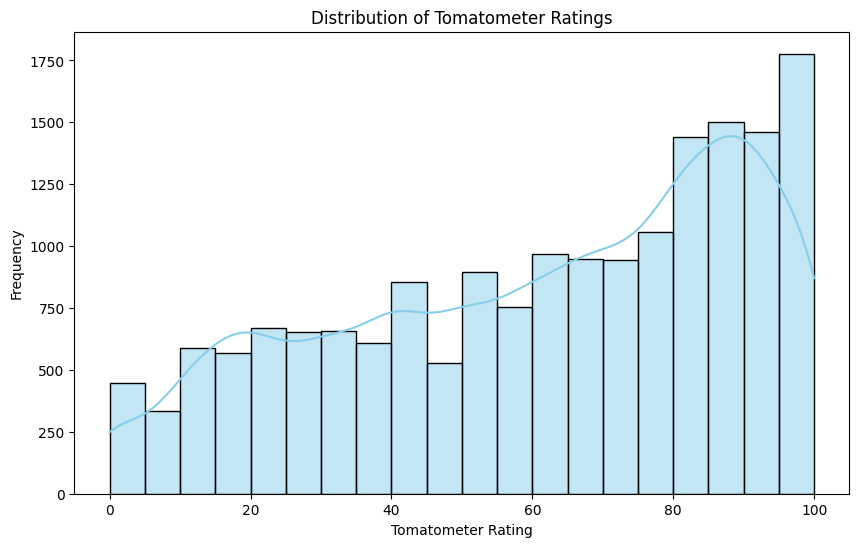

In [4]:

plt.figure(figsize=(10, 6))
sns.histplot(df['tomatometer_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of Tomatometer ratings for the movies in your dataset. Most movies seem to have ratings clustered around a certain range, providing insights into the overall critical reception of the movies.

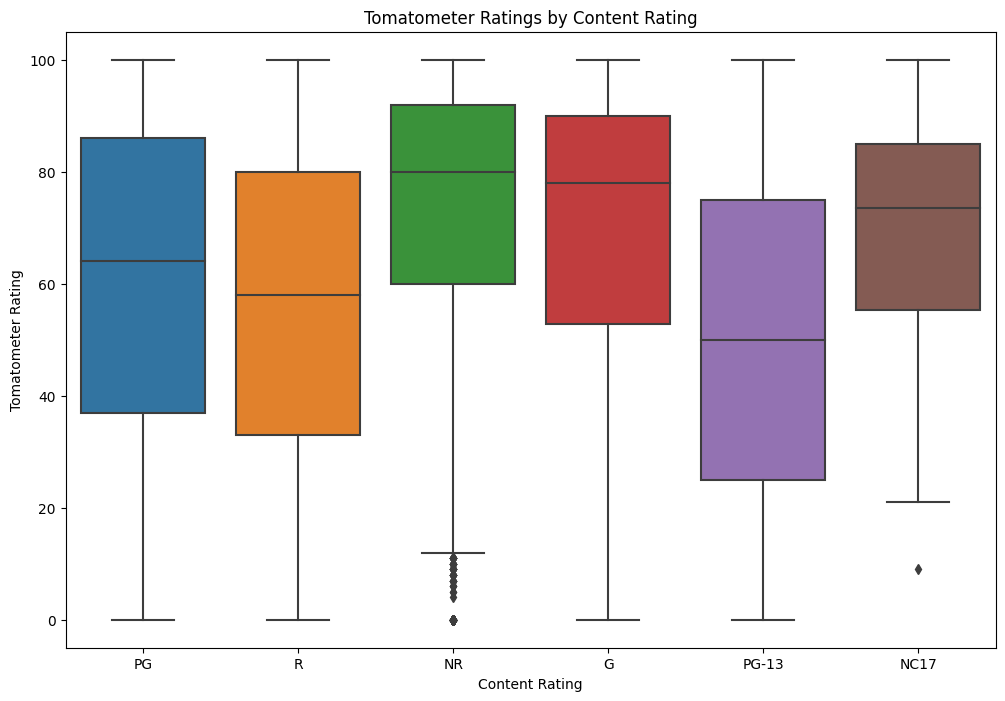

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='content_rating', y='tomatometer_rating', data=df)
plt.title('Tomatometer Ratings by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Tomatometer Rating')
plt.show()


Comment: This boxplot provides a visual comparison of Tomatometer ratings across different content ratings, offering insights into how movies are rated based on their content.

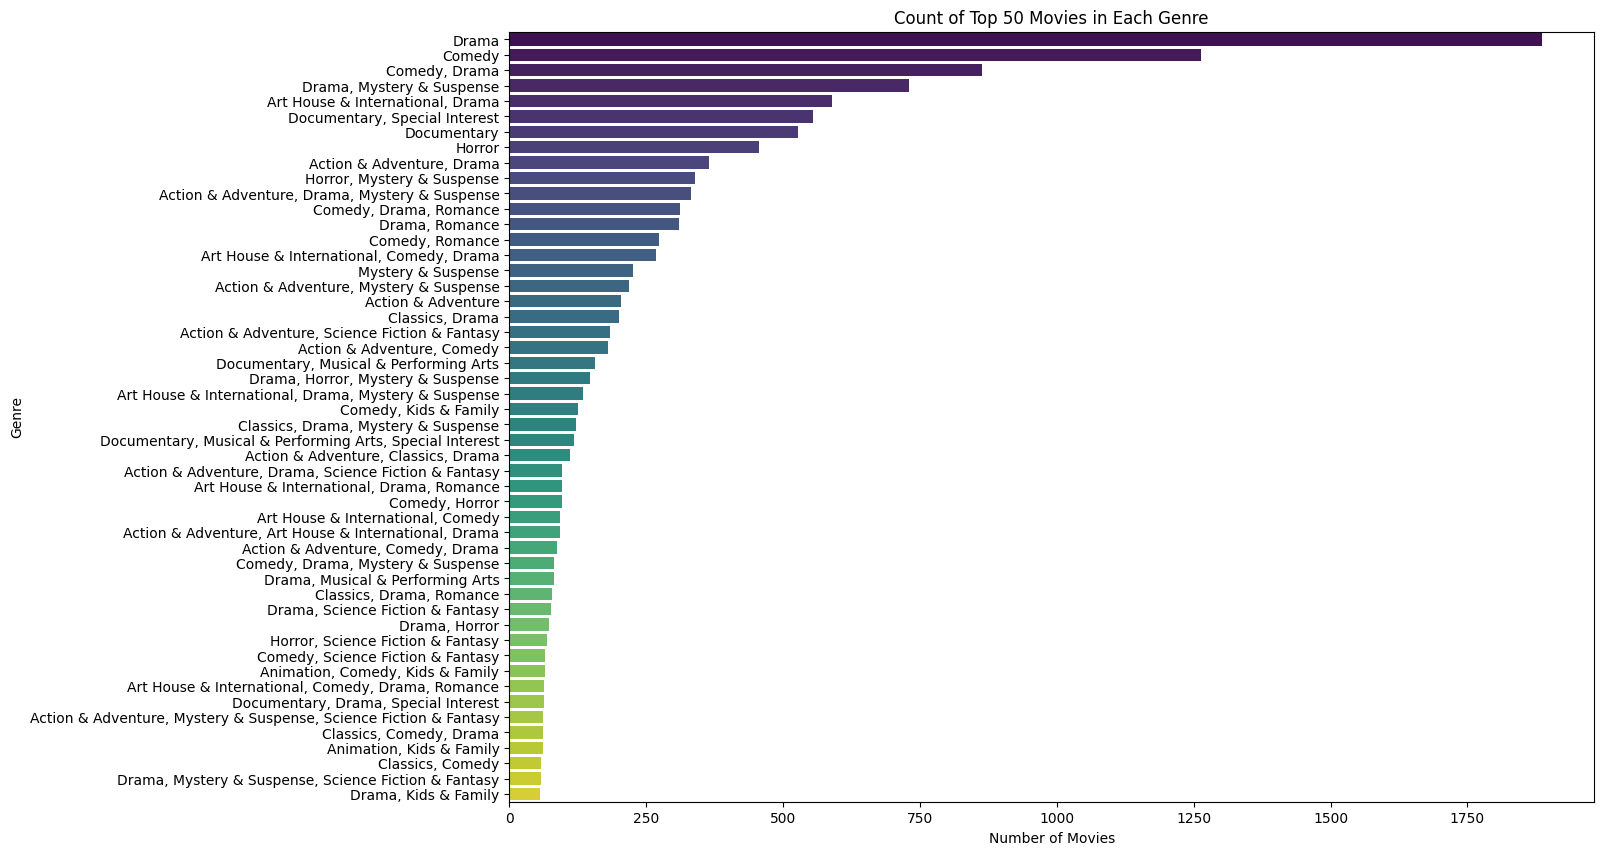

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing movie information with a 'genres' column

top_50_genres = df['genres'].value_counts().nlargest(50).index
df_top_50 = df[df['genres'].isin(top_50_genres)]

plt.figure(figsize=(14, 10))
sns.countplot(y='genres', data=df_top_50, order=df_top_50['genres'].value_counts().index, palette='viridis')
plt.title('Count of Top 50 Movies in Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



 top 50 genres based on the count of movies and then filters the DataFrame to include only those top 50 genres before creating the count plot. Adjust the figure size and other parameters as needed for your visualization.

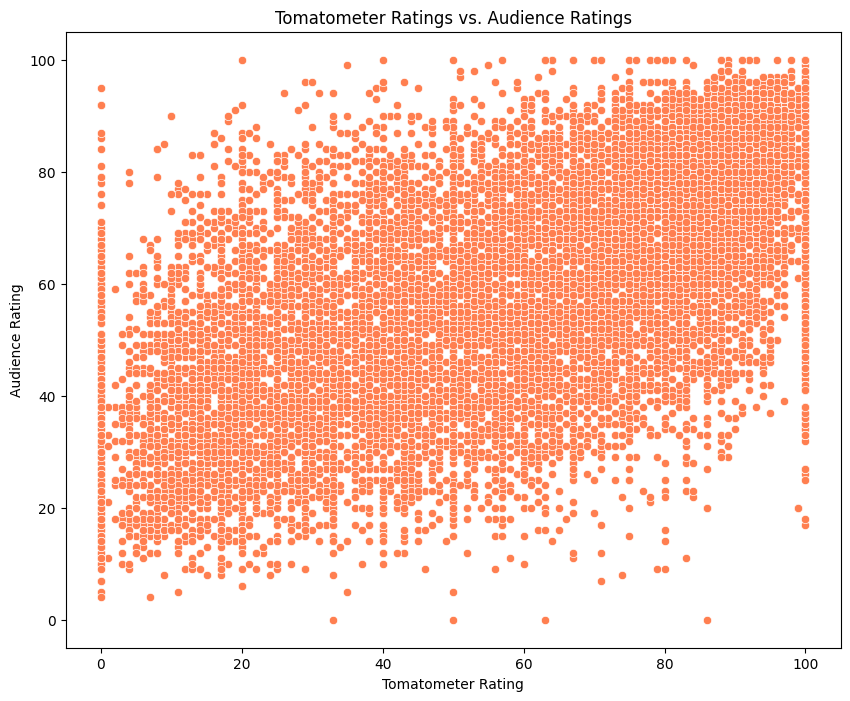

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='coral')
plt.title('Tomatometer Ratings vs. Audience Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()


Comment: The scatter plot reveals the relationship between Tomatometer ratings and audience ratings, providing insights into how critics' and audience opinions align.

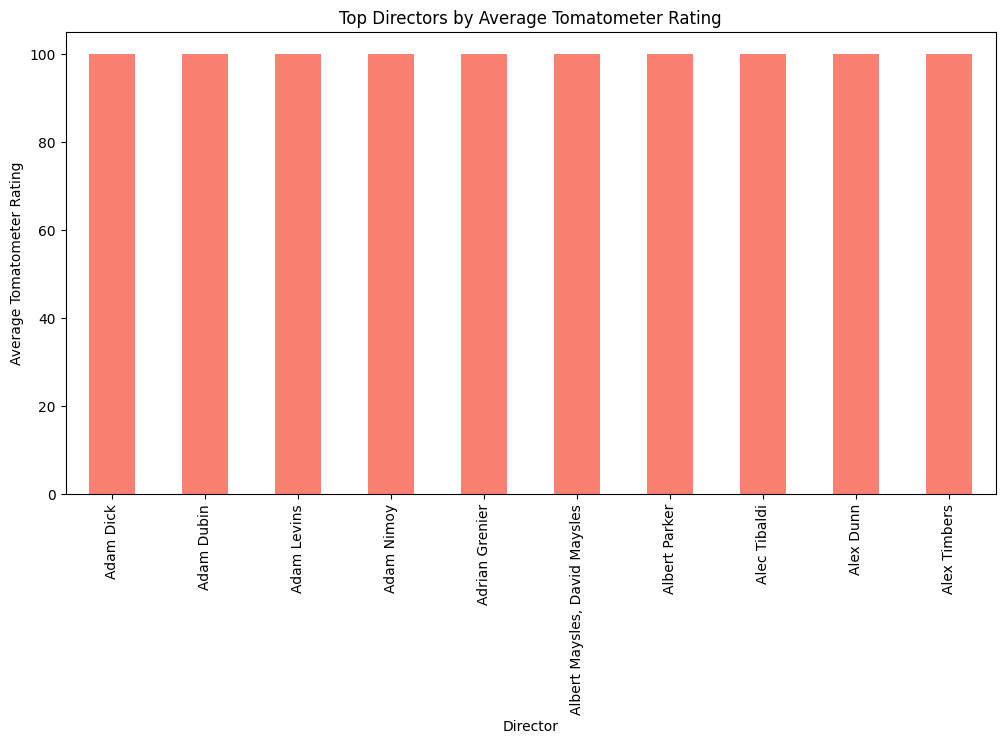

In [8]:
top_directors = df.groupby('directors')['tomatometer_rating'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='salmon')
plt.title('Top Directors by Average Tomatometer Rating')
plt.xlabel('Director')
plt.ylabel('Average Tomatometer Rating')
plt.show()


Comment: This bar plot highlights the top directors based on the average Tomatometer ratings of their movies, allowing you to identify directors with consistently high ratings.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

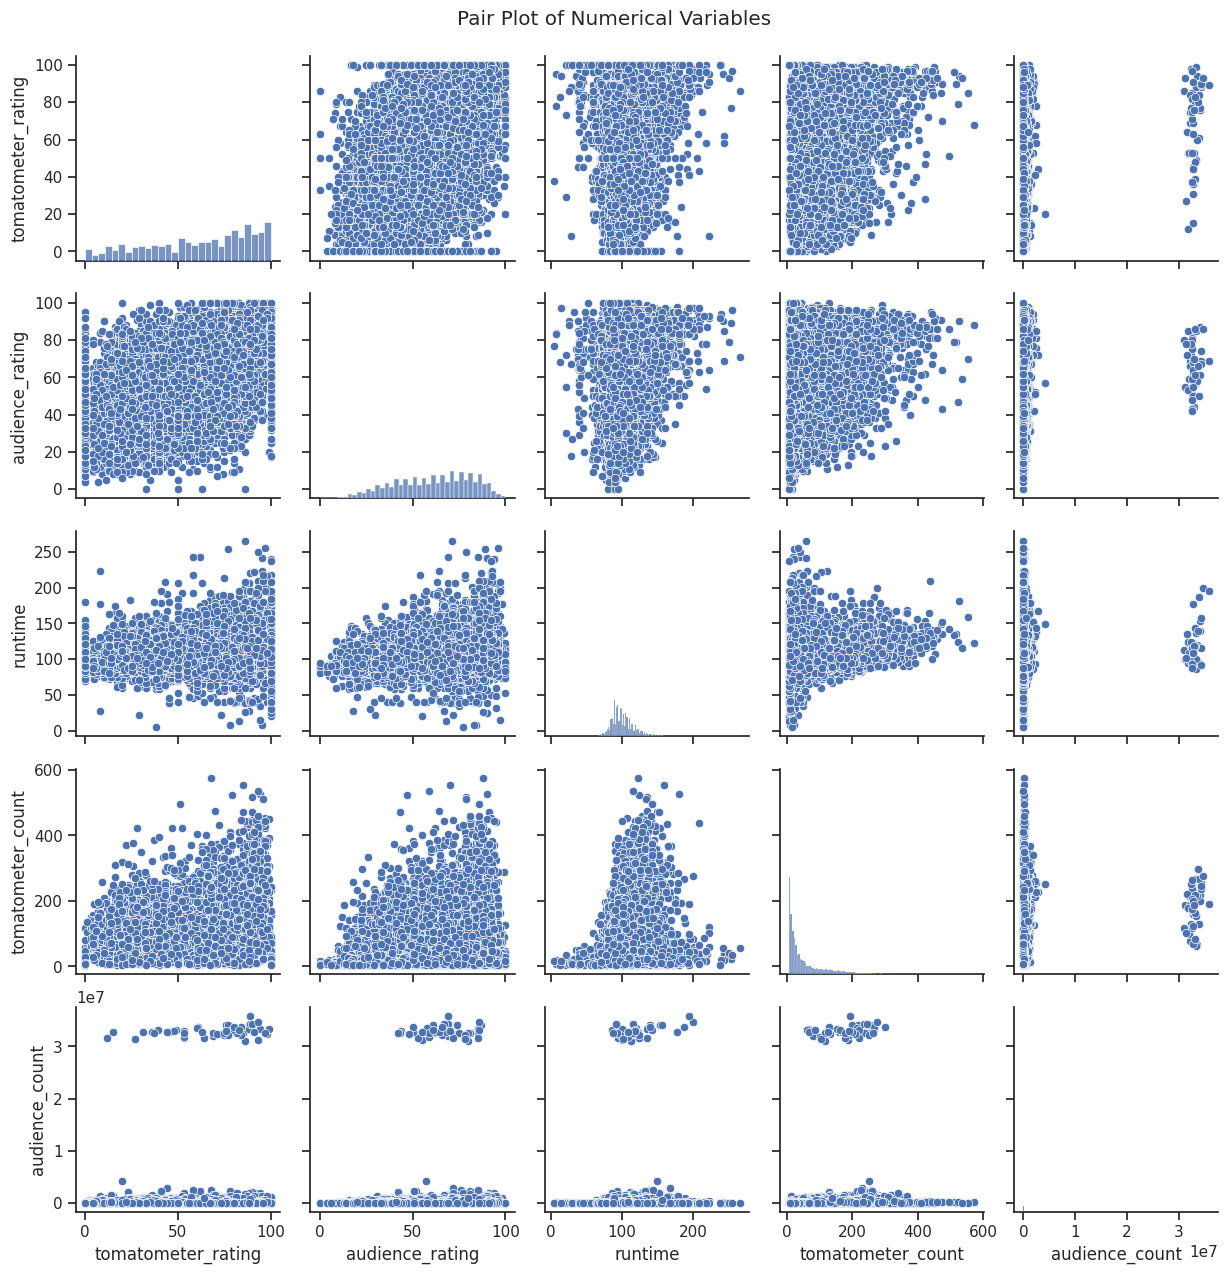

In [9]:
numerical_columns = ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count']
# Subsetting the dataframe
numerical_df = df[numerical_columns]
sns.set(style="ticks")
sns.pairplot(numerical_df, palette='Set2')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


Missing Values:
rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

Summary Statistics:
            runtime  tomatometer_rating  tomatom

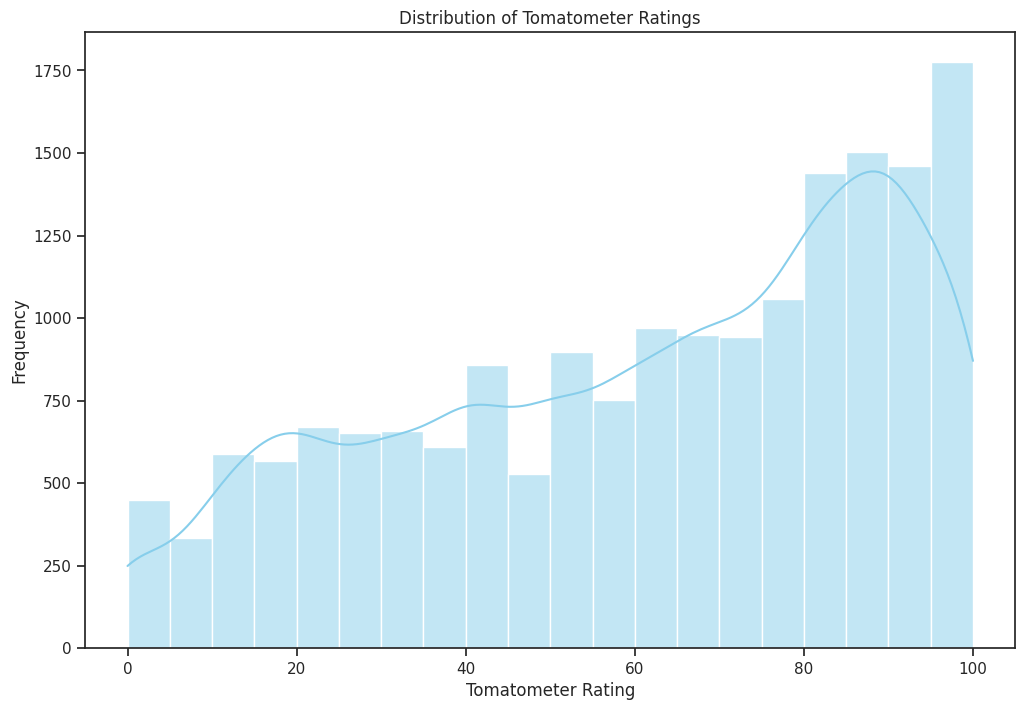


Unique Genres:
['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy' 'Comedy'
 'Comedy, Romance' ...
 'Animation, Art House & International, Drama, Science Fiction & Fantasy, Romance'
 'Art House & International, Romance'
 'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense']

Inconsistent Counts:
                        rotten_tomatoes_link  \
0                                  m/0814255   
1                                  m/0878835   
2                                       m/10   
3                     m/1000013-12_angry_men   
4      m/1000079-20000_leagues_under_the_sea   
...                                      ...   
17707                            m/zoot_suit   
17708                             m/zootopia   
17709                      m/zorba_the_greek   
17710                                 m/zulu   
17711                            m/zulu_dawn   

                                             movie_title  \
0      Percy Jackson & the Olympian

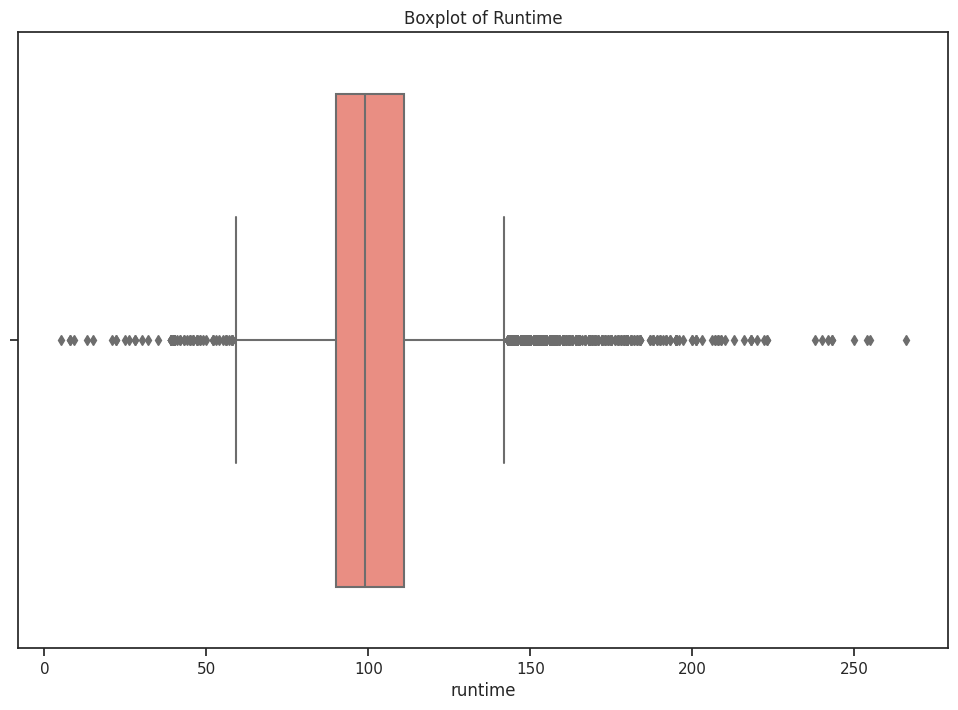


Data Types:
rotten_tomatoes_link                        object
movie_title                                 object
movie_info                                  object
critics_consensus                           object
content_rating                              object
genres                                      object
directors                                   object
authors                                     object
actors                                      object
original_release_date               datetime64[ns]
streaming_release_date                      object
runtime                                    float64
production_company                          object
tomatometer_status                          object
tomatometer_rating                         float64
tomatometer_count                          float64
audience_status                             object
audience_rating                            float64
audience_count                             float64
tomatometer_top_cr

In [10]:

# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# 2. Summary Statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

# 3. Duplicated Data
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicates)

# 4. Distribution of Numerical Variables
plt.figure(figsize=(12, 8))
sns.histplot(df['tomatometer_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.show()

# 5. Categorical Variables
unique_genres = df['genres'].unique()
print("\nUnique Genres:")
print(unique_genres)

# 6. Consistency Checks
inconsistent_counts = df[df['audience_count'] > df['tomatometer_count']]
print("\nInconsistent Counts:")
print(inconsistent_counts)

# 7. Date and Time Data (if applicable)
# Assuming 'original_release_date' is a date column
df['original_release_date'] = pd.to_datetime(df['original_release_date'])

# 8. Cross-Validation
# Assuming you have a target variable named 'target_column'
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("\nTraining Set Shape:", train.shape)
print("Testing Set Shape:", test.shape)

# 9. Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='runtime', data=df, color='salmon')
plt.title('Boxplot of Runtime')
plt.show()

# 10. Data Types
data_types = df.dtypes
print("\nData Types:")
print(data_types)

# 11. Data Entry Errors
# Examine text columns for inconsistencies
# For example, assuming 'content_rating' is a categorical column
unique_content_ratings = df['content_rating'].unique()
print("\nUnique Content Ratings:")
print(unique_content_ratings)

# 12. Domain Knowledge
# Apply domain-specific knowledge to verify the correctness of values

# Feel free to adapt these checks based on your specific dataset and analysis goals.


In [11]:
df = df.dropna(subset=['tomatometer_rating', 'audience_rating', 'runtime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17169 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              17169 non-null  object        
 1   movie_title                       17169 non-null  object        
 2   movie_info                        17147 non-null  object        
 3   critics_consensus                 9035 non-null   object        
 4   content_rating                    17169 non-null  object        
 5   genres                            17150 non-null  object        
 6   directors                         16997 non-null  object        
 7   authors                           15780 non-null  object        
 8   actors                            16874 non-null  object        
 9   original_release_date             16237 non-null  datetime64[ns]
 10  streaming_release_date            17055 non-null  o

In [12]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import joblib



def gener(data):
    no_genre = data[pd.isnull(data['genres'])]
    i = data[pd.isnull(data['genres'])].index
    listgenre = ['Science Fiction & Fantasy','Drama','Animation','Animation','Animation','Action & Adventure','Musical & Performing Arts','Romance','Action & Adventure','Drama','Comedy','Animation','Action & Adventure','Horror','Action & Adventure','Mystery & Suspense','Science Fiction & Fantasy','Documentary','Animation']

    for g in range(0,len(no_genre)):
        data.loc[i[g],'genres'] = listgenre[g]
        continue

    df = data['genres'].str.get_dummies(',')
    data = pd.concat([data,df],axis=1)
    return data
def encoding(data):
    drop_column = ["movie_title","rotten_tomatoes_link","movie_info","original_release_date","streaming_release_date","critics_consensus","genres","directors","authors","actors","production_company"]
    data.drop(drop_column,axis=1,inplace=True)

    cont_col = list(data.describe())
    cat_col = list(c for c in data.columns if c not in cont_col)

    cont_data = data.loc[:, cont_col]
    cat_data = data.loc[:, cat_col]

    imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
    cont_data = imputer.fit_transform(cont_data)

    imputer2 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    cat_data = imputer2.fit_transform(cat_data)

    cat_data = pd.DataFrame(cat_data)
    cat_data.columns = cat_col
    cont_data = pd.DataFrame(cont_data)
    cont_data.columns = cont_col

    oe = OrdinalEncoder(categories=[['Rotten','Fresh','Certified-Fresh']])
    cat_data['tomatometer_status'] = oe.fit_transform(cat_data[['tomatometer_status']])

    data = pd.concat([cat_data,cont_data],axis=1)
    column_name = 'tomatometer_rating'

    column = data.pop(column_name)

    data[column_name] = column
    return data

transformer_gener = FunctionTransformer(gener)
transformer_encoding = FunctionTransformer(encoding)

pipeline = make_pipeline(
    transformer_gener,
    transformer_encoding
)

data = pd.read_csv('/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')

data = pipeline.transform(data)
joblib_filename = 'processed_data_pipeline.joblib'

joblib.dump(pipeline, joblib_filename)
print(f"Data Pipeline has been saved as {joblib_filename}")

Data Pipeline has been saved as processed_data_pipeline.joblib


In [13]:
print(data.columns)
print(data.info())

Index(['content_rating', 'tomatometer_status', 'audience_status', 'runtime',
       'tomatometer_count', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', ' Animation', ' Anime & Manga',
       ' Art House & International', ' Classics', ' Comedy', ' Cult Movies',
       ' Documentary', ' Drama', ' Faith & Spirituality', ' Gay & Lesbian',
       ' Horror', ' Kids & Family', ' Musical & Performing Arts',
       ' Mystery & Suspense', ' Romance', ' Science Fiction & Fantasy',
       ' Special Interest', ' Sports & Fitness', ' Television', ' Western',
       'Action & Adventure', 'Animation', 'Art House & International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Horror',
       'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense',
       'Romance', 'Science Fiction & Fantasy', 'Special Interest',
       'Television', 'Western', 'tomatometer_ratin

In [14]:
eda_columns = ['content_rating', 'tomatometer_status', 'audience_status', 'runtime',
               'tomatometer_count', 'audience_rating', 'audience_count',
               'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
               'tomatometer_rotten_critics_count', ' Animation', ' Anime & Manga',
               ' Art House & International', ' Classics', ' Comedy', ' Cult Movies',
               ' Documentary', ' Drama', ' Faith & Spirituality', ' Gay & Lesbian',
               ' Horror', ' Kids & Family', ' Musical & Performing Arts',
               ' Mystery & Suspense', ' Romance', ' Science Fiction & Fantasy',
               ' Special Interest', ' Sports & Fitness', ' Television', ' Western',
               'Action & Adventure', 'Animation', 'Art House & International',
               'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Horror',
               'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense',
               'Romance', 'Science Fiction & Fantasy', 'Special Interest',
               'Television', 'Western', 'tomatometer_rating']

Comments:

Pair Plot:

The pair plot provides a visual overview of relationships between different numerical variables. Look for patterns, clusters, or trends in the scatterplots. For example, check if there are any noticeable relationships between 'tomatometer_rating' and other variables.
Correlation Matrix Heatmap:

The heatmap visualizes the correlation coefficients between numerical variables. Pay attention to strong positive or negative correlations. This can help identify which variables are strongly related. For instance, high positive correlation between 'tomatometer_rating' and 'audience_rating' may suggest a consistent audience and critic sentiment.

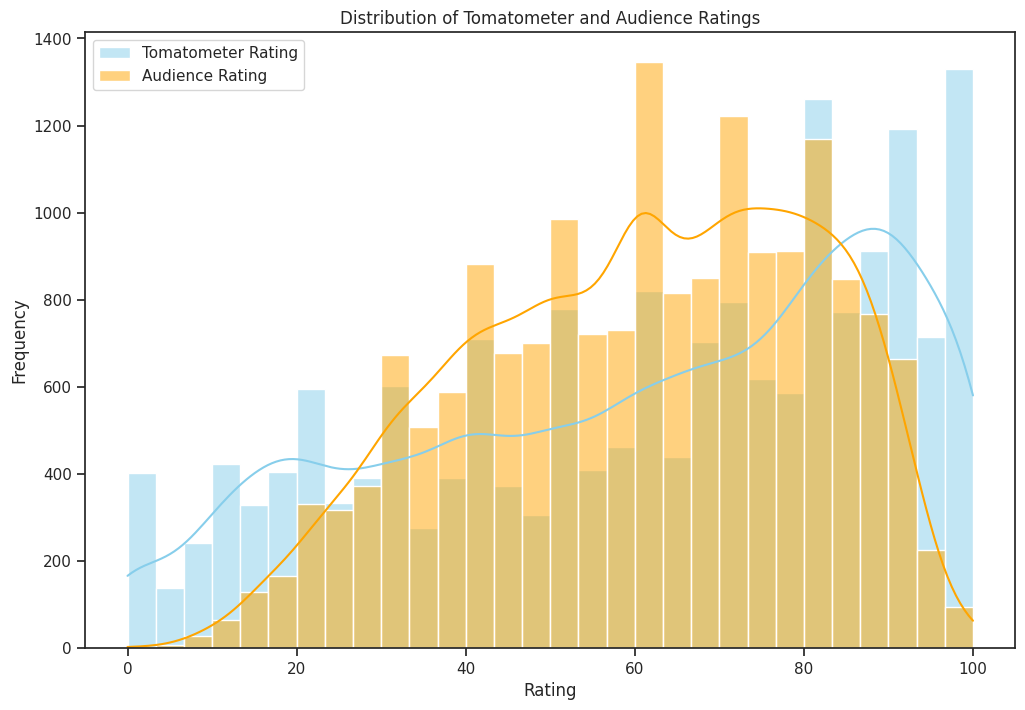

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(12, 8))
sns.histplot(data['tomatometer_rating'], bins=30, kde=True, color='skyblue', label='Tomatometer Rating')
sns.histplot(data['audience_rating'], bins=30, kde=True, color='orange', label='Audience Rating')
plt.title('Distribution of Tomatometer and Audience Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Distribution of Ratings:

The histogram shows the distribution of Tomatometer and Audience Ratings. Check if the ratings follow a normal distribution or if there are any noticeable patterns.
Boxplot of Runtime by Content Rating:

Explore how runtime varies across different content ratings. Look for any significant differences or outliers.
Bar Plot of Content Rating:

Visualize the distribution of movies across different content ratings. This provides an overview of the dataset's content composition.
Relationship between Tomatometer and Audience Ratings:

The scatter plot helps identify the correlation between Tomatometer and Audience Ratings. Check if there is a linear relationship or any clusters.
Pair Plot Focusing on Ratings and Runtime:

This pair plot zooms in on the variables related to ratings and runtime, providing a more detailed view of their relationships.

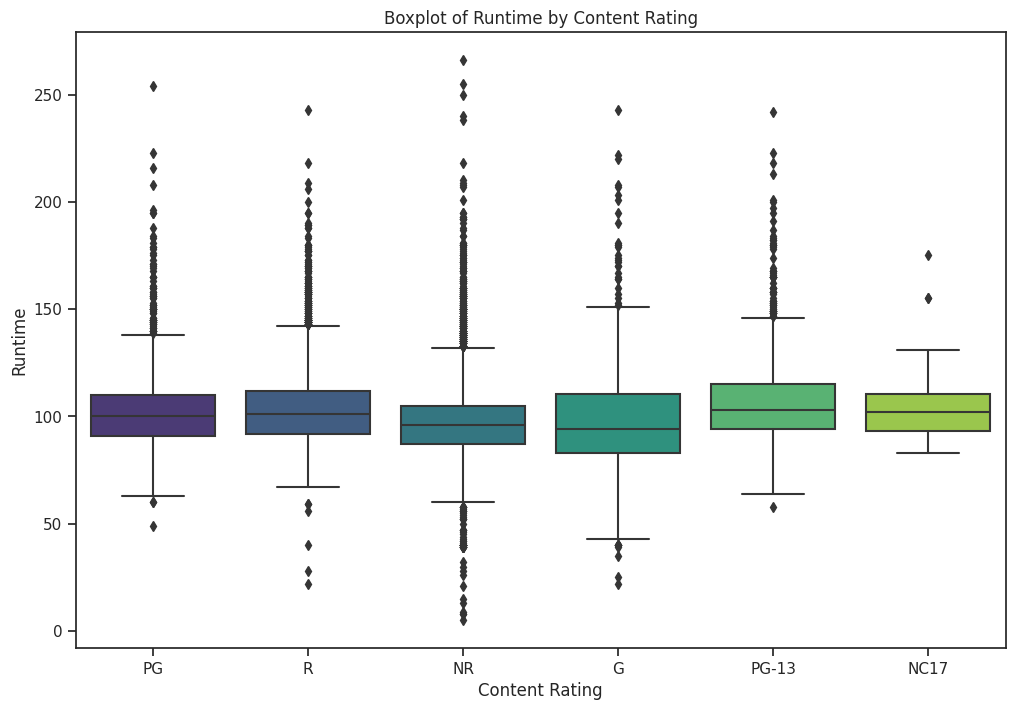

In [17]:
# Boxplot of Runtime
plt.figure(figsize=(12, 8))
sns.boxplot(x='content_rating', y='runtime', data=data, palette='viridis')
plt.title('Boxplot of Runtime by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Runtime')
plt.show()



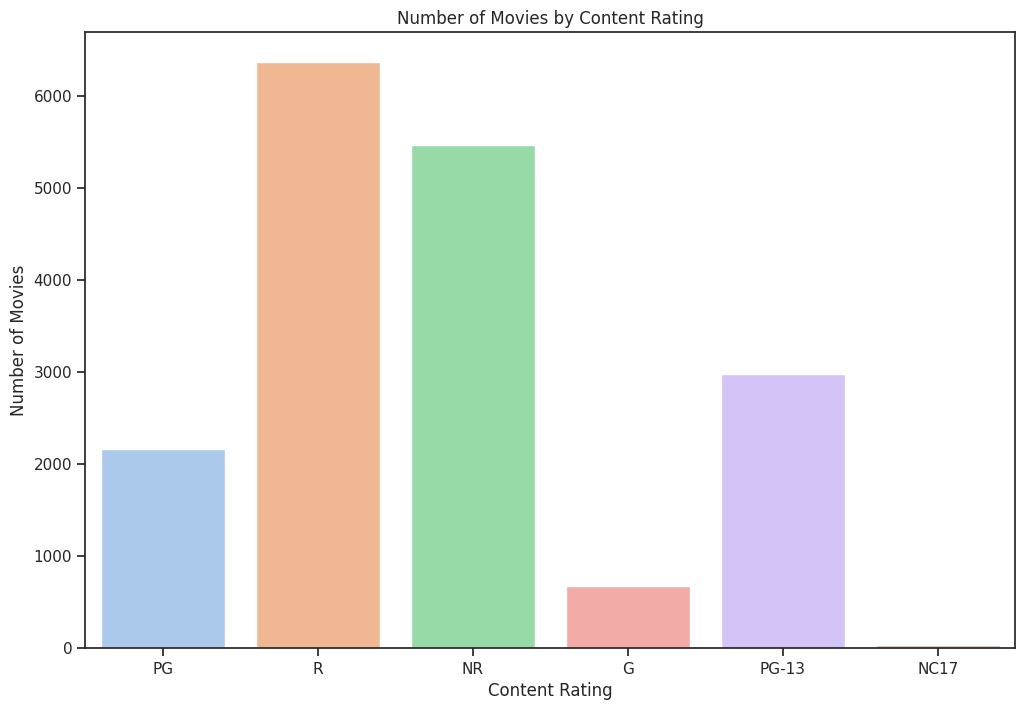

In [18]:
# Bar plot of Content Rating
plt.figure(figsize=(12, 8))
sns.countplot(x='content_rating', data=data, palette='pastel')
plt.title('Number of Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.show()



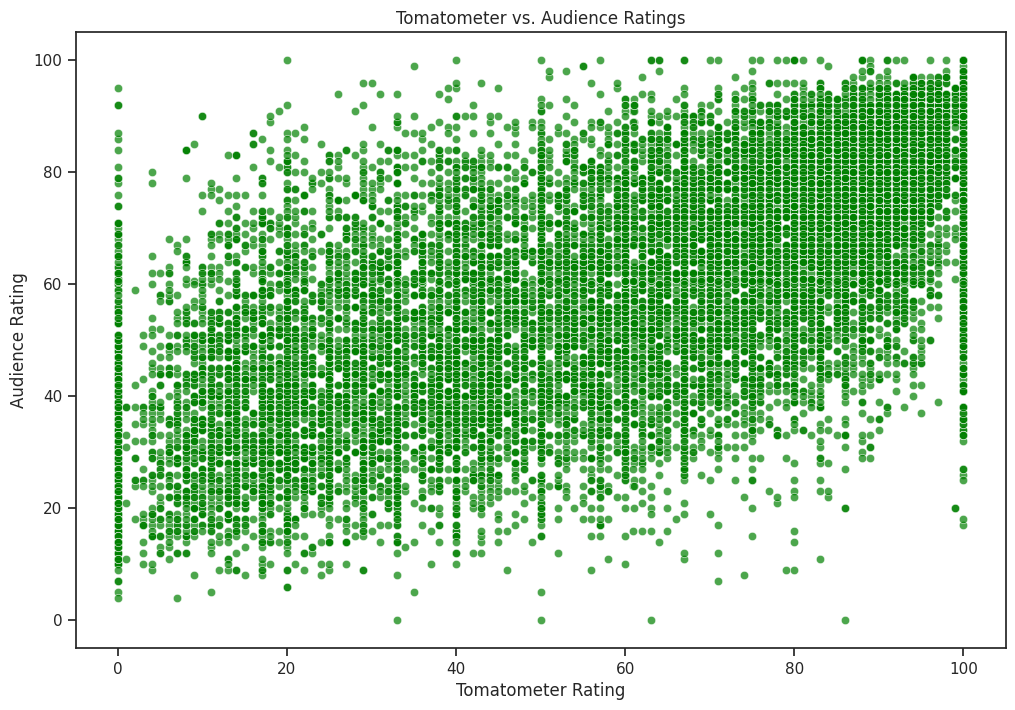

In [19]:
# Relationship between Tomatometer and Audience Ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=data, color='green', alpha=0.7)
plt.title('Tomatometer vs. Audience Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()



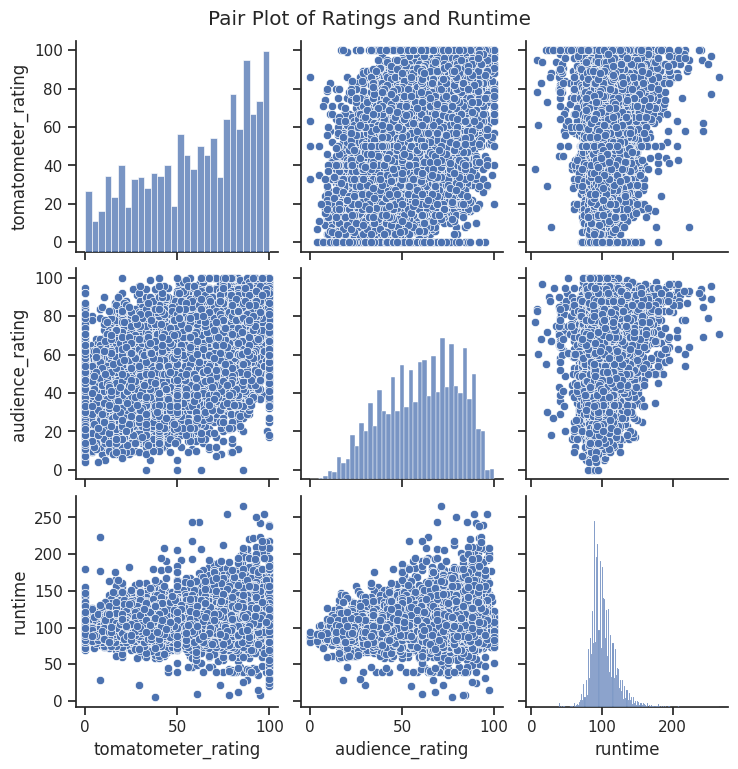

In [20]:
# Pair plot focusing on ratings and runtime
ratings_runtime_columns = ['tomatometer_rating', 'audience_rating', 'runtime']
sns.pairplot(data[ratings_runtime_columns])
plt.suptitle('Pair Plot of Ratings and Runtime', y=1.02)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17169 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              17169 non-null  object        
 1   movie_title                       17169 non-null  object        
 2   movie_info                        17147 non-null  object        
 3   critics_consensus                 9035 non-null   object        
 4   content_rating                    17169 non-null  object        
 5   genres                            17150 non-null  object        
 6   directors                         16997 non-null  object        
 7   authors                           15780 non-null  object        
 8   actors                            16874 non-null  object        
 9   original_release_date             16237 non-null  datetime64[ns]
 10  streaming_release_date            17055 non-null  o

In [25]:
from scipy.stats import pearsonr

# Assuming df is your DataFrame
# Drop any rows with missing values in 'runtime' or 'tomatometer_rating'
df_cleaned = df.dropna(subset=['runtime', 'tomatometer_rating'])

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df_cleaned['runtime'], df_cleaned['tomatometer_rating'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant, and we reject the null hypothesis.")
else:
    print("The correlation is not statistically significant, and we fail to reject the null hypothesis.")


Pearson Correlation Coefficient: 0.09413008412249388
P-value: 4.276596293677606e-35
The correlation is statistically significant, and we reject the null hypothesis.


In [26]:
from scipy.stats import f_oneway
df_cleaned = df.dropna(subset=['tomatometer_rating', 'movie_title'])
unique_titles = df_cleaned['movie_title'].unique()
rating_groups = [df_cleaned[df_cleaned['movie_title'] == title]['tomatometer_rating'] for title in unique_titles]
f_statistic, p_value = f_oneway(*rating_groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is evidence of a significant relationship between movie titles and tomatometer ratings.")
else:
    print("There is no significant evidence of a relationship between movie titles and tomatometer ratings.")


F-statistic: 1.0356329447414823
P-value: 0.28696910171796575
There is no significant evidence of a relationship between movie titles and tomatometer ratings.


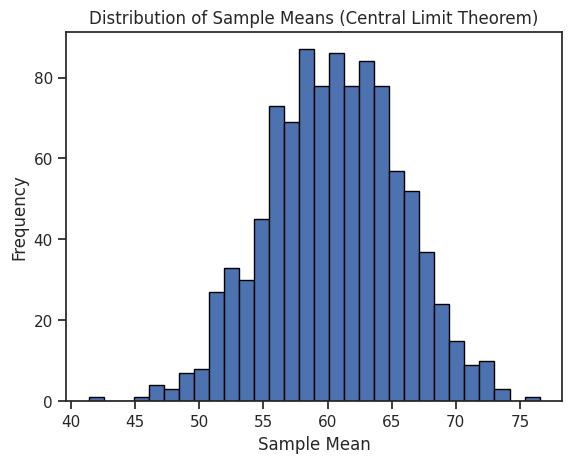

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop any rows with missing values in 'tomatometer_rating'
df_cleaned = df.dropna(subset=['tomatometer_rating'])

# Choose a sample size
sample_size = 30

# Number of samples
num_samples = 1000

# Create an array to store sample means
sample_means = []

# Draw random samples and calculate means
for _ in range(num_samples):
    sample = np.random.choice(df_cleaned['tomatometer_rating'], size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot the histogram of sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


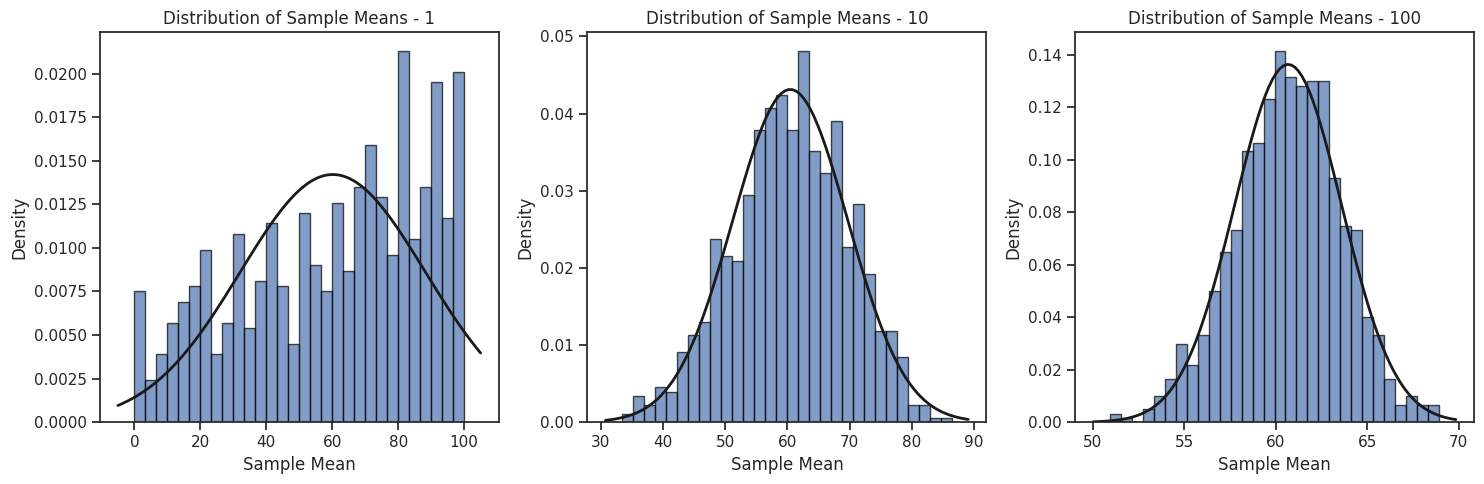

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming df is your DataFrame
# Drop any rows with missing values in 'tomatometer_rating'
df_cleaned = df.dropna(subset=['tomatometer_rating'])

# Choose a sample size
sample_size = 30

# Number of samples
num_samples = 1000

# Create an array to store sample means for each set
sample_means_set1 = []
sample_means_set2 = []
sample_means_set3 = []

# Generate and plot three sets of sample means
for _ in range(num_samples):
    # Set 1
    sample_set1 = np.random.choice(df_cleaned['tomatometer_rating'], size=1, replace=True)
    sample_mean_set1 = np.mean(sample_set1)
    sample_means_set1.append(sample_mean_set1)

    # Set 2
    sample_set2 = np.random.choice(df_cleaned['tomatometer_rating'], size=10, replace=True)
    sample_mean_set2 = np.mean(sample_set2)
    sample_means_set2.append(sample_mean_set2)

    # Set 3
    sample_set3 = np.random.choice(df_cleaned['tomatometer_rating'], size=100, replace=True)
    sample_mean_set3 = np.mean(sample_set3)
    sample_means_set3.append(sample_mean_set3)

# Plot the histograms for each set with distribution lines
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sample_means_set1, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means - 1')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
# Add distribution line
xmin, xmax = plt.xlim()
x_set1 = np.linspace(xmin, xmax, 100)
p_set1 = norm.pdf(x_set1, np.mean(sample_means_set1), np.std(sample_means_set1))
plt.plot(x_set1, p_set1, 'k', linewidth=2)

plt.subplot(1, 3, 2)
plt.hist(sample_means_set2, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means - 10')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
# Add distribution line
xmin, xmax = plt.xlim()
x_set2 = np.linspace(xmin, xmax, 100)
p_set2 = norm.pdf(x_set2, np.mean(sample_means_set2), np.std(sample_means_set2))
plt.plot(x_set2, p_set2, 'k', linewidth=2)

plt.subplot(1, 3, 3)
plt.hist(sample_means_set3, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means - 100')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
# Add distribution line
xmin, xmax = plt.xlim()
x_set3 = np.linspace(xmin, xmax, 100)
p_set3 = norm.pdf(x_set3, np.mean(sample_means_set3), np.std(sample_means_set3))
plt.plot(x_set3, p_set3, 'k', linewidth=2)

plt.tight_layout()
plt.show()